<a href="https://colab.research.google.com/github/sumanankur108/eda-theory-da/blob/main/mod_5_21bds0097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Ankur Suman 21BDS0097

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [7]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [8]:
%cd exploratory-data-analysis/

/content/drive/MyDrive/exploratory-data-analysis


In [9]:
!ls

liver_data.csv


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [12]:
liver_data = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/liver_data.csv')
liver_data[['Age of the patient', 'Total Protiens']] = liver_data.iloc[:, [3, 4]].values

In [14]:
print(liver_data.head())

   Age of the patient Gender of the patient  Total Bilirubin  \
0                 0.1                Female              0.7   
1                 5.5                  Male             10.9   
2                 4.1                  Male              7.3   
3                 0.4                  Male              1.0   
4                 2.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3         

In [15]:
print(liver_data.tail())

       Age of the patient Gender of the patient  Total Bilirubin  \
30686                 1.0                  Male              2.2   
30687                 1.3                  Male              2.9   
30688                 3.0                  Male              6.8   
30689                 1.0                Female              1.9   
30690                 1.6                  Male              3.1   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
30686               1.0                          610.0   
30687               1.3                          482.0   
30688               3.0                          542.0   
30689               1.0                          231.0   
30690               1.6                          253.0   

        Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
30686                            17.0                             28.0   
30687                            22.0                             34.0   
30688               

In [19]:
print(liver_data.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


## Using the elbow method to find the optimal number of clusters

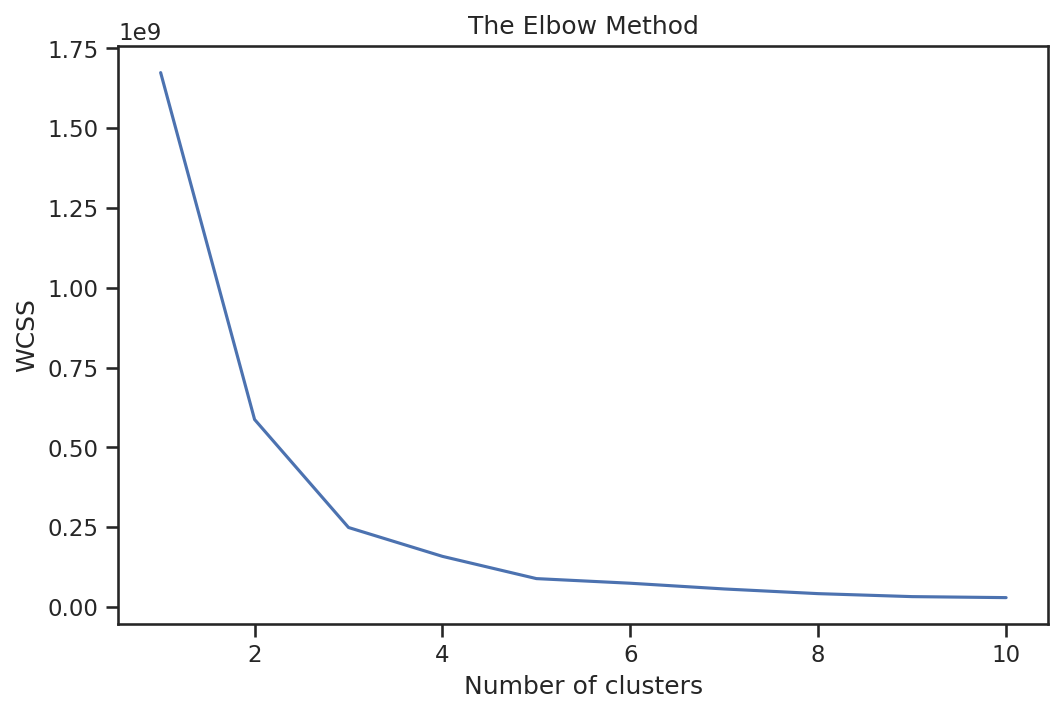

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop NaN values for clustering
cleaned_data = liver_data[['Age of the patient', 'Total Protiens']].dropna()

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cleaned_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [23]:
from sklearn.cluster import KMeans

# Drop NaN values
cleaned_data = liver_data[['Age of the patient', 'Total Protiens']].dropna()

# Apply KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(cleaned_data)

# Add the cluster result to the DataFrame
cleaned_data['Cluster'] = clusters

# Display the first few rows
print(cleaned_data.head())

   Age of the patient  Total Protiens  Cluster
0                 0.1           187.0        0
1                 5.5           699.0        3
2                 4.1           490.0        3
3                 0.4           182.0        0
4                 2.0           195.0        0


## Visualising the clusters

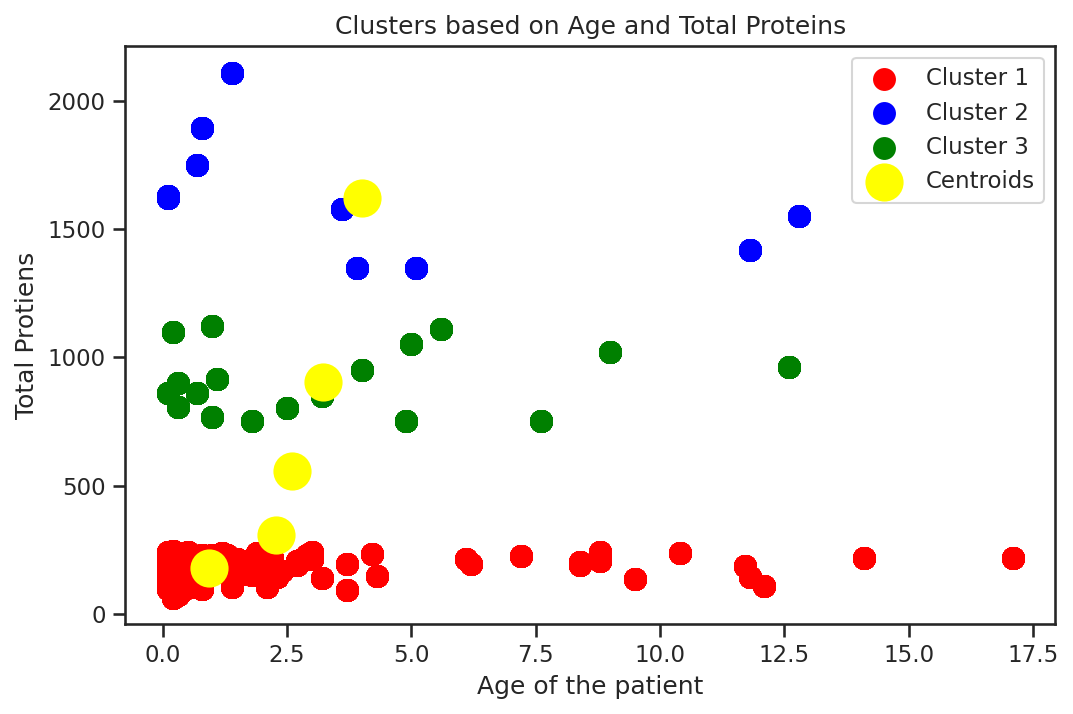

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.scatter(cleaned_data['Age of the patient'][cleaned_data['Cluster'] == 0],
            cleaned_data['Total Protiens'][cleaned_data['Cluster'] == 0],
            s=100, c='red', label='Cluster 1')

plt.scatter(cleaned_data['Age of the patient'][cleaned_data['Cluster'] == 1],
            cleaned_data['Total Protiens'][cleaned_data['Cluster'] == 1],
            s=100, c='blue', label='Cluster 2')

plt.scatter(cleaned_data['Age of the patient'][cleaned_data['Cluster'] == 2],
            cleaned_data['Total Protiens'][cleaned_data['Cluster'] == 2],
            s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters based on Age and Total Proteins')
plt.xlabel('Age of the patient')
plt.ylabel('Total Protiens')
plt.legend()
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

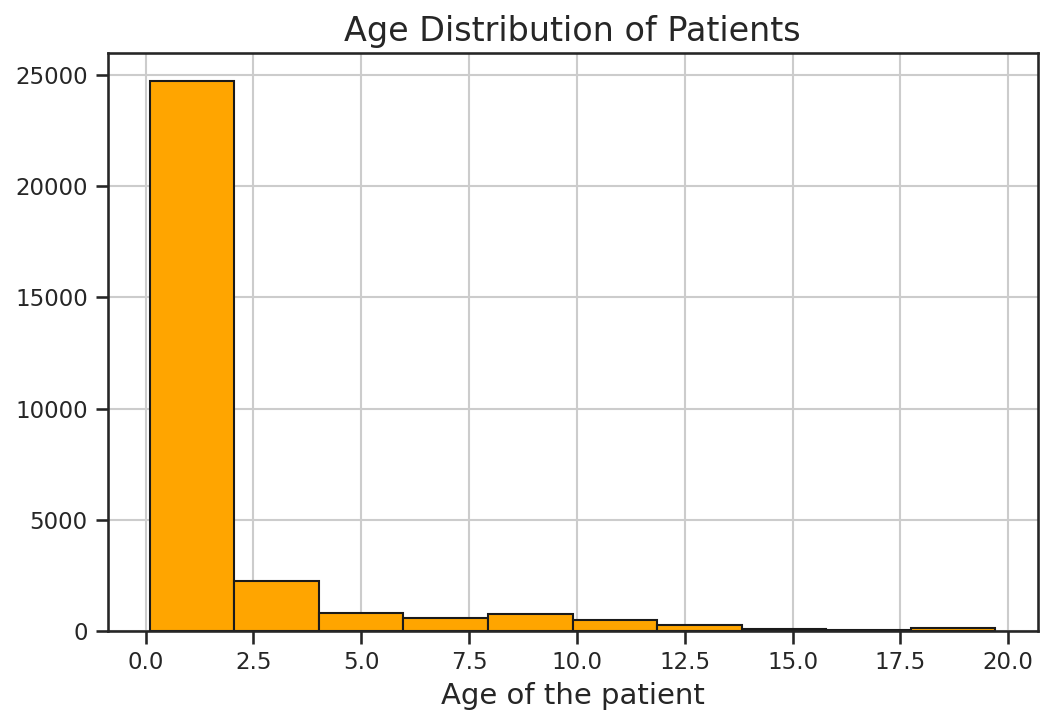

In [27]:
plt.figure(figsize=(8, 5))
plt.title("Age Distribution of Patients", fontsize=16)
plt.xlabel("Age of the patient", fontsize=14)
plt.grid(True)
plt.hist(liver_data['Age of the patient'], color='orange', edgecolor='k')
plt.show()

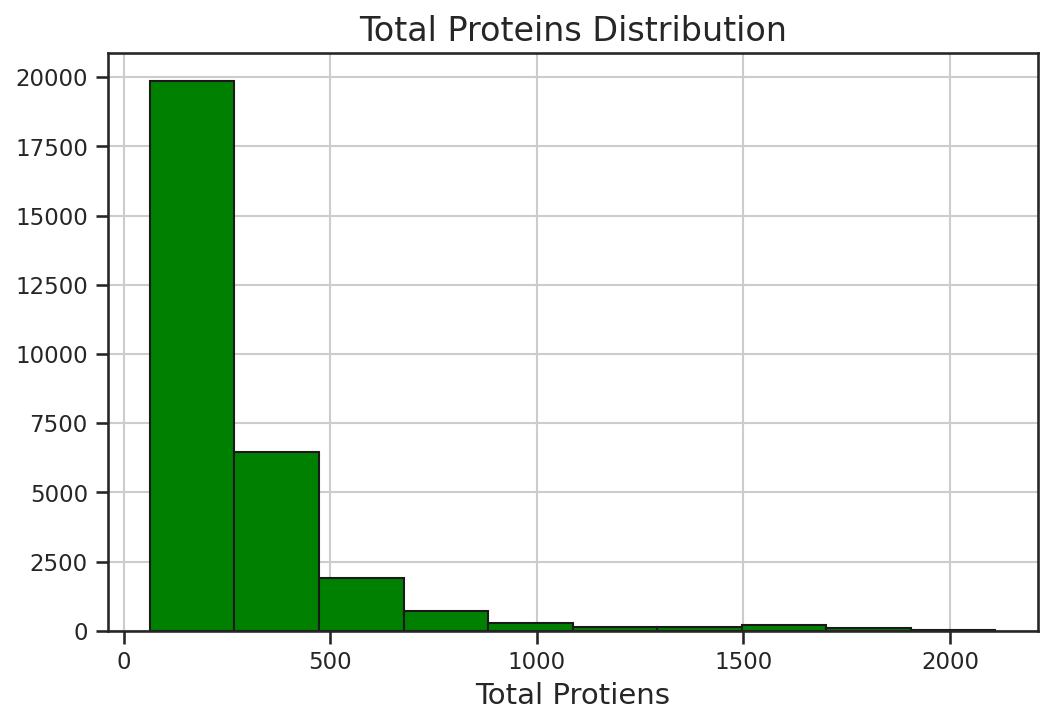

In [28]:
plt.figure(figsize=(8, 5))
plt.title("Total Proteins Distribution", fontsize=16)
plt.xlabel("Total Protiens", fontsize=14)
plt.grid(True)
plt.hist(liver_data['Total Protiens'], color='green', edgecolor='k')
plt.show()

In [30]:
#Dendograms
liver_data[['Age of the patient', 'Total Protiens']] = liver_data.iloc[:,[3,4]].values

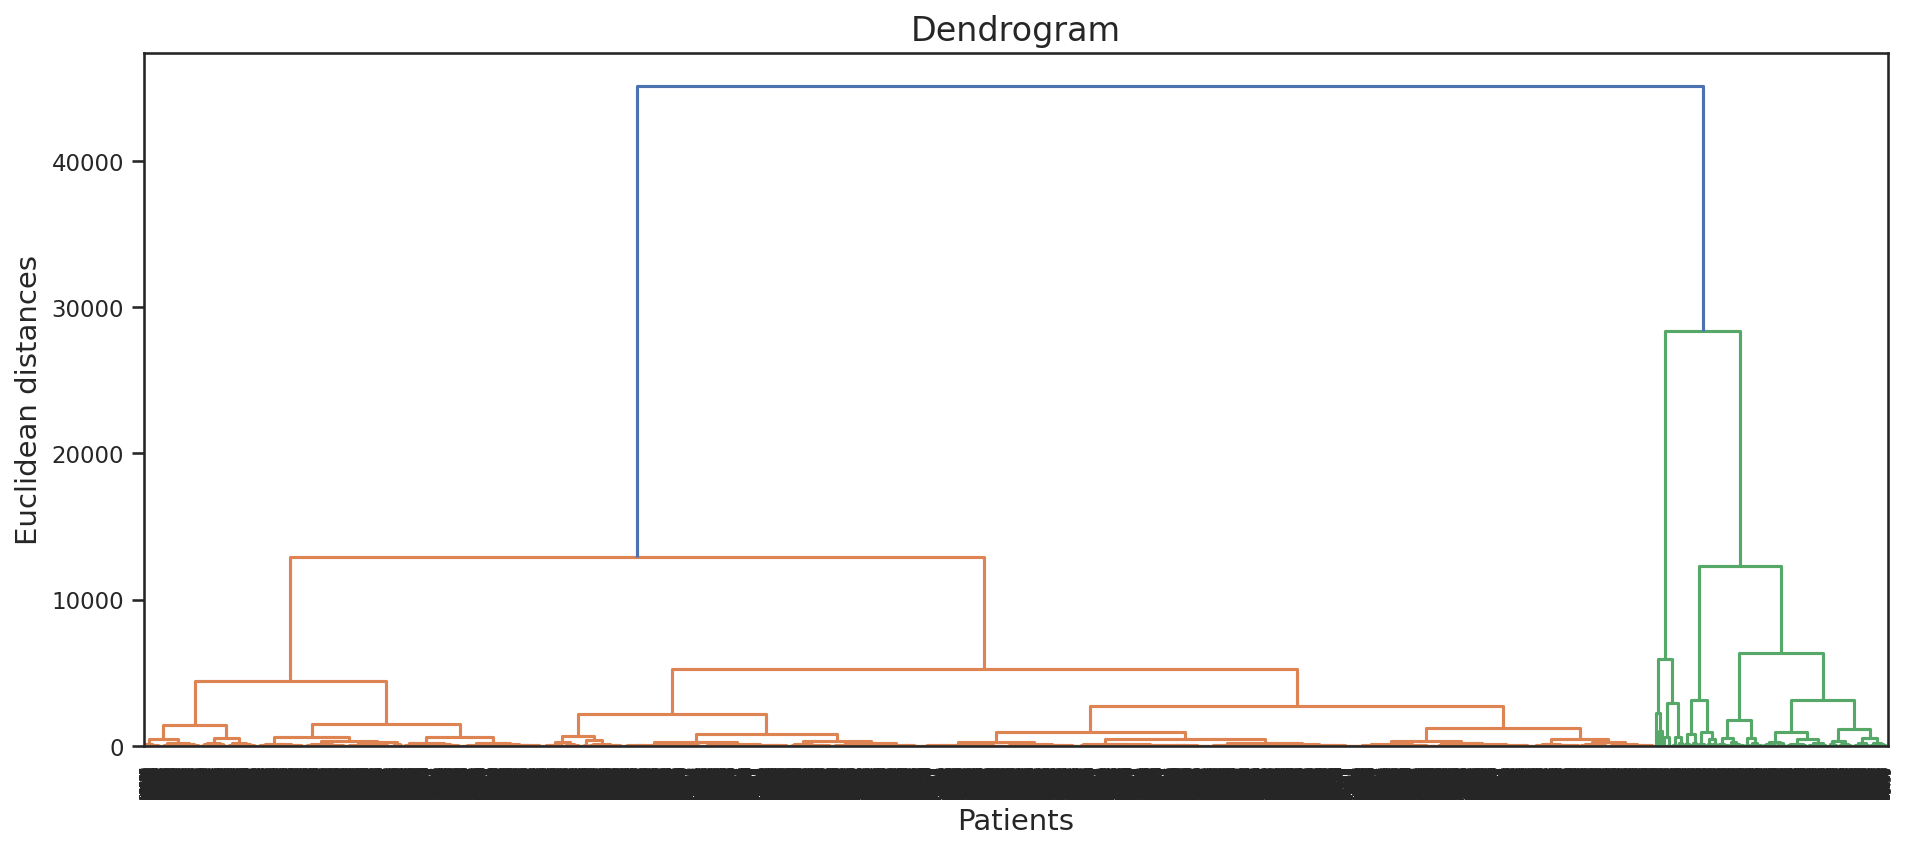

In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('Patients', fontsize=14)
plt.ylabel('Euclidean distances', fontsize=14)

# Remove missing values before clustering
cleaned_data = liver_data[['Age of the patient', 'Total Protiens']].dropna()

# Plot dendrogram
dendrogram = sch.dendrogram(sch.linkage(cleaned_data, method='ward'))
plt.show()

##Optimal number of clusters
Often, the optimal number of clusters can be found from a Dendogram is a simple manner.

* Look for the longest stretch of vertical line which is not crossed by any extended horizontal lines (here extended means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
* Now take any point on that stretch of line and draw an imaginary horizontal line.
* Count how many vertical lines this imaginary lines crossed.
* That is likely to be the optimal number of clusters.


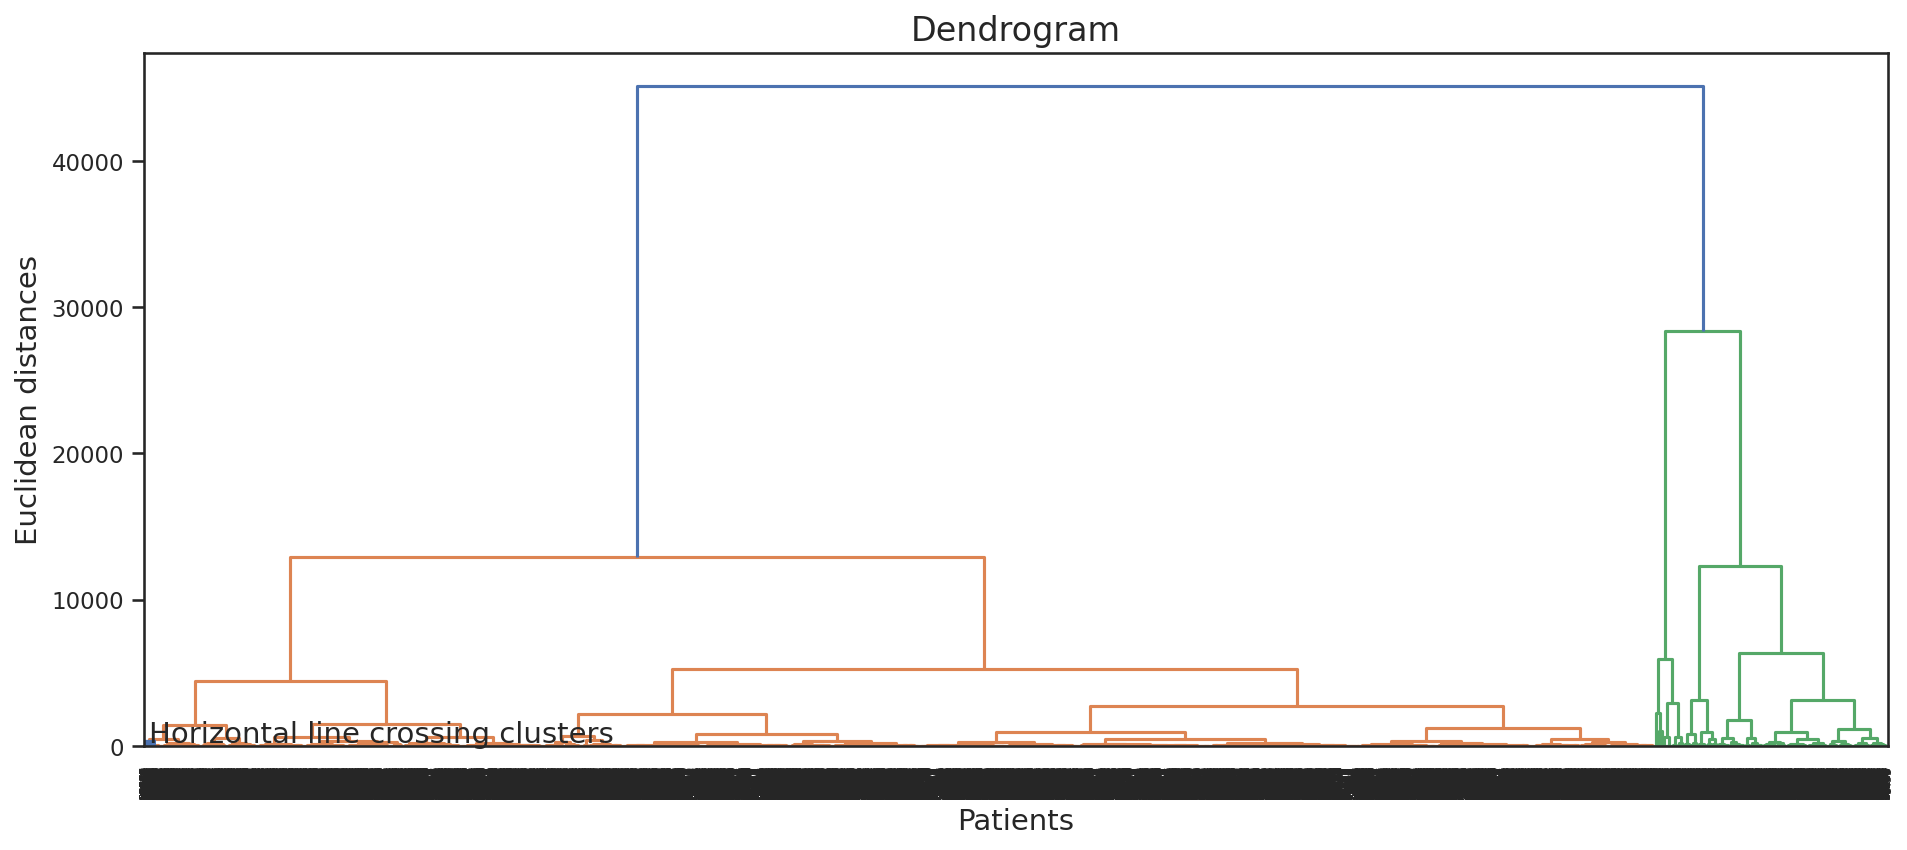

In [32]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('Patients', fontsize=14)
plt.ylabel('Euclidean distances', fontsize=14)

# Drop missing values
cleaned_data = liver_data[['Age of the patient', 'Total Protiens']].dropna()

# Plot dendrogram
dendrogram = sch.dendrogram(sch.linkage(cleaned_data, method='ward'))

# Add horizontal line
plt.hlines(y=190, xmin=0, xmax=2000, lw=3, linestyles='--')

# Add annotation text
plt.text(x=900, y=220, s='Horizontal line crossing clusters', fontsize=14)

plt.show()